<a href="https://colab.research.google.com/github/jasbirpradhan93/Fashion-Project/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import itertools

import tensorflow as tf
from tensorflow.keras.layers import Input,SimpleRNN,GRU,LSTM,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.datasets import fashion_mnist
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()


In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
print(f'Shape of the train data:   {train_data.shape}')
print(f'Shape of the train labels: {train_labels.shape}')
print(f'Shape of the test data:    {test_data.shape}')
print(f'Shape of the test labels:  {test_labels.shape}')

Shape of the train data:   (60000, 28, 28)
Shape of the train labels: (60000,)
Shape of the test data:    (10000, 28, 28)
Shape of the test labels:  (10000,)


In [ ]:
# Check shape of a single example
print(f'Shape of a train sample: {train_data[0].shape}')
print(f'Shape of a train label:  {train_labels[0].shape}')

Shape of a train sample: (28, 28)
Shape of a train label:  ()


Text(0.5, 1.0, "Encoded label: 2;  'Real' label: Pullover")

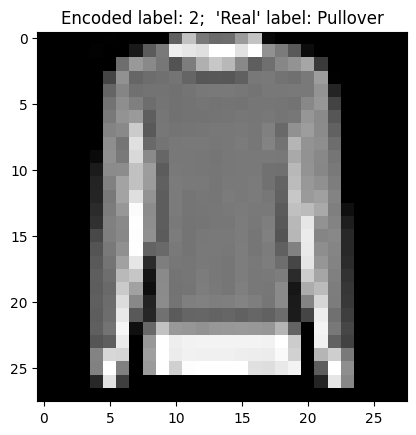

In [ ]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

i = np.random.choice(len(train_data))
plt.imshow(train_data[i],cmap='gray')
plt.title(f"Encoded label: {train_labels[i]};  'Real' label: {classes[train_labels[i]]}")

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
# Train-validation splitting
X_train,X_validation,y_train,y_validation = train_test_split(train_data,train_labels,
                                                             test_size=0.3,random_state=0)

# Set random seed
tf.random.set_seed(42)

# Create the model
model1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history1 = model1.fit(train_data,train_labels,
                            epochs=30,validation_data=(X_validation,y_validation))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7463 - loss: 0.7581 - val_accuracy: 0.8492 - val_loss: 0.4178
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8546 - loss: 0.4110 - val_accuracy: 0.8713 - val_loss: 0.3586
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8674 - loss: 0.3670 - val_accuracy: 0.8804 - val_loss: 0.3329
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8760 - loss: 0.3387 - val_accuracy: 0.8839 - val_loss: 0.3215
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8817 - loss: 0.3215 - val_accuracy: 0.8880 - val_loss: 0.3090
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8874 - loss: 0.3061 - val_accuracy: 0.8897 - val_loss: 0.3058
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8914 - loss: 0.2951 - val_accuracy: 0.8923 - val_loss: 0.2935
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8945 - loss: 0.2846 - 

In [ ]:
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,357 (477.96 KB)

 Trainable params: 40,785 (159.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,572 (318.64 KB)

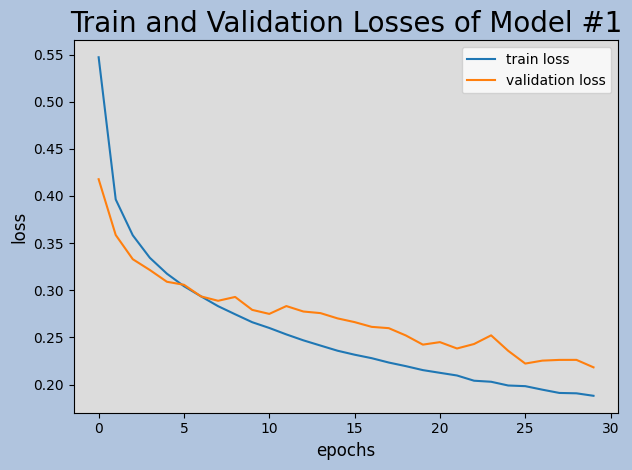

In [ ]:
plt.plot(history1.history['loss'],label='train loss')
plt.plot(history1.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #1',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')


In [ ]:
score = model1.evaluate(test_data,test_labels,verbose=0)
print('Test Loss : {:.3f}'.format(score[0]))
print('Test Accuracy : {:.3f}'.format(score[1]))

Test Loss : 0.428
Test Accuracy : 0.876


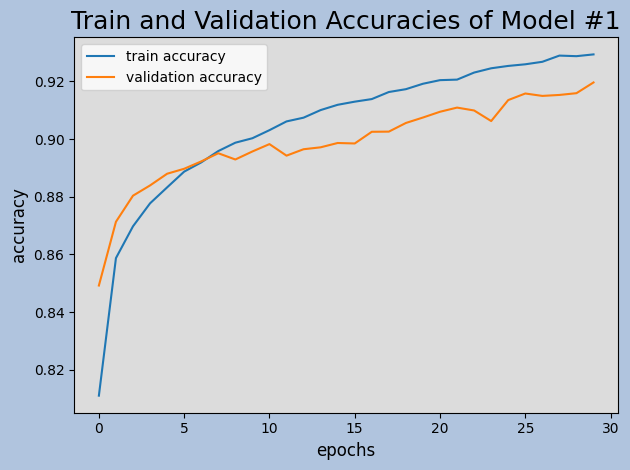

In [ ]:
plt.plot(history1.history['accuracy'],label='train accuracy')
plt.plot(history1.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #1',fontsize=18)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

       If classes is passed, confusion matrix will be labelled, if not, integer class values
       will be used.

       Args:
         y_true: Array of truth labels (must be same shape as y_pred).
         y_pred: Array of predicted labels (must be same shape as y_true).
         classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
         figsize: Size of output figure (default=(10,10)).
         text_size: Size of output figure text (default=15).

       Returns:
         A labelled confusion matrix plot comparing y_true and y_pred.

       Example usage:
         make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15,15),
                          text_size=10)
    """
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

  # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=text_size)

In [ ]:
# These are the predicted class probabilities (probs)
y_probs = model1.predict(test_data)

# I am printing the first prediction.
# This is a list of ten numbers (ranging from 0 to 1),
# each corresponding to one of the Fashion MNIST classes
y_probs[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([8.0669500e-14, 2.3558038e-13, 8.5112635e-19, 1.8078551e-11,
       7.7492185e-13, 2.4772386e-09, 6.2463872e-19, 3.0441387e-04,
       1.9724637e-16, 9.9969560e-01], dtype=float32)

In [ ]:
# The probs need to be converted in the predicted labels
# by choosing the highest probability in the list
pred_labels = y_probs.argmax(axis=1)

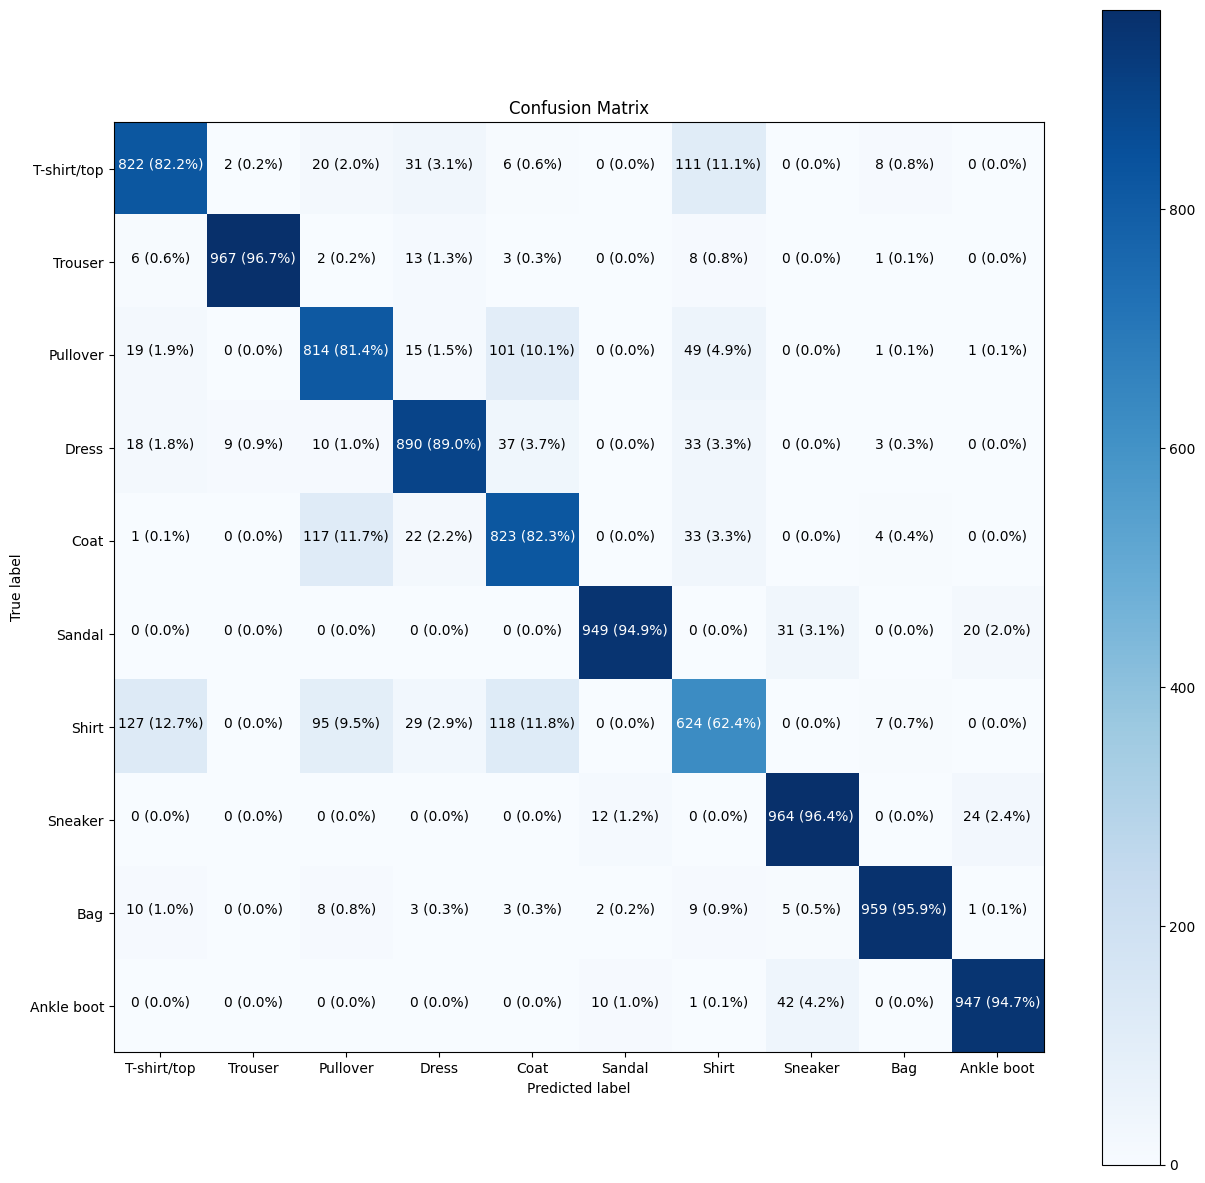

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=pred_labels,
                      classes=classes,
                      figsize=(15,15),
                      text_size=10)

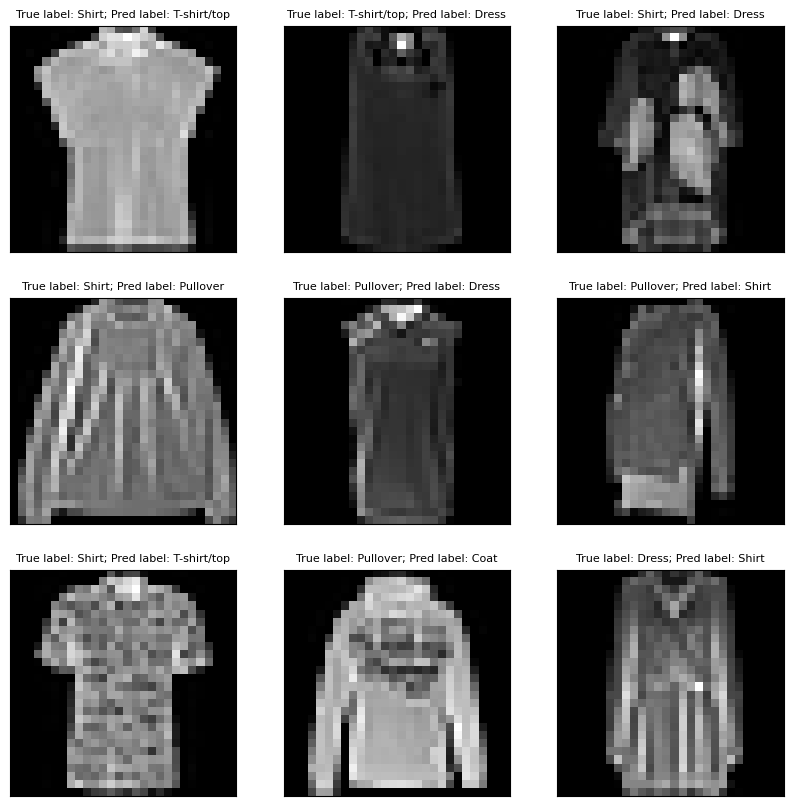

In [ ]:
misclassified_idx = np.where(test_labels != pred_labels)[0]

plt.figure(figsize=(10,10))

for i in range(9):
    idx = np.random.choice(misclassified_idx)
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_data[idx].reshape((28,28)),cmap='gray')
    label_index = int(pred_labels[idx])
    plt.title(f'True label: {classes[test_labels[idx]]}; Pred label: {classes[pred_labels[idx]]}',fontsize=8)
plt.show()

In [ ]:
# The data is only 2D!
# Convolution expects height x width x color
X_train = np.expand_dims(X_train,-1)
X_validation = np.expand_dims(X_validation,-1)
print(X_train.shape)

(42000, 28, 28, 1)


In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), strides=2, activation='relu', input_shape=X_train[0].shape),
  tf.keras.layers.Conv2D(64, (3,3), strides=2, activation='relu'),
  tf.keras.layers.Conv2D(128, (3,3), strides=2, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history2 = model2.fit(train_data,train_labels,
                      epochs=50,
                      validation_data=(X_validation,y_validation))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7296 - loss: 0.7483 - val_accuracy: 0.8570 - val_loss: 0.3765
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8518 - loss: 0.3974 - val_accuracy: 0.8804 - val_loss: 0.3154
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8724 - loss: 0.3391 - val_accuracy: 0.8949 - val_loss: 0.2748
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8846 - loss: 0.3034 - val_accuracy: 0.9070 - val_loss: 0.2483
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8965 - loss: 0.2712 - val_accuracy: 0.9118 - val_loss: 0.2338
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9030 - loss: 0.2523 - val_accuracy: 0.9209 - val_loss: 0.2032
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9107 - loss: 0.2316 - val_accuracy: 0.9301 - val_loss: 0.1846
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9169 - loss: 0.215

In [ ]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 13, 13, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,880 (1.83 MB)

 Trainable params: 159,626 (623.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 319,254 (1.22 MB)

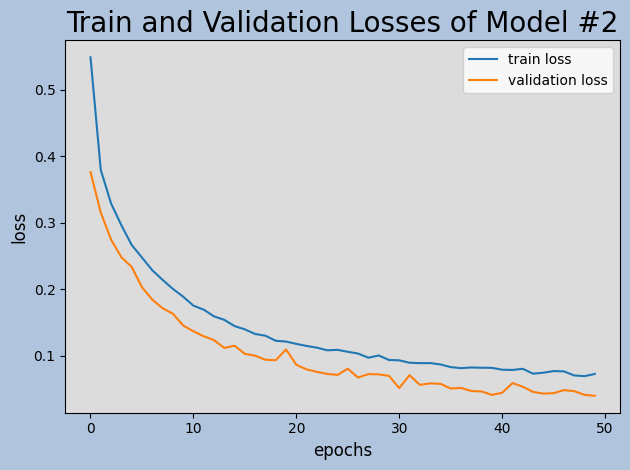

In [ ]:
plt.plot(history2.history['loss'],label='train loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #2',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

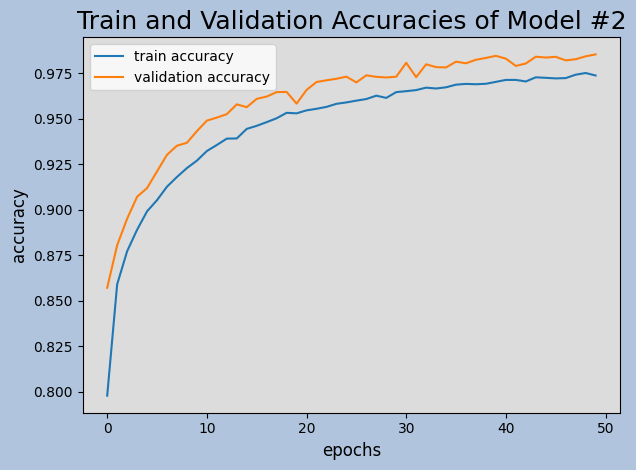

In [ ]:
plt.plot(history2.history['accuracy'],label='train accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #2',fontsize=18)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
X_test = np.expand_dims(test_data,-1)

score2 = model2.evaluate(X_test,test_labels,verbose=0)
print('Test Loss : {:.3f}'.format(score2[0]))
print('Test Accuracy : {:.3f}'.format(score2[1]))

Test Loss : 0.563
Test Accuracy : 0.896


In [ ]:
score = model1.evaluate(test_data,test_labels,verbose=0)
print('Test Loss : {:.3f}'.format(score[0]))
print('Test Accuracy : {:.3f}'.format(score[1]))

Test Loss : 0.428
Test Accuracy : 0.876


In [ ]:
# Train-validation splitting
X_train,X_validation,y_train,y_validation = train_test_split(train_data,train_labels,
                                                             test_size=0.3,random_state=0)

# The data is only 2D!
# Convolution expects height x width x color
X_train = np.expand_dims(X_train,-1)
X_validation = np.expand_dims(X_validation,-1)
print(X_train.shape)

(42000, 28, 28, 1)


In [ ]:
# Set random seed
tf.random.set_seed(42)

model3 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same",
                            input_shape=X_train[0].shape),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
        tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
        tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax")
])
# Compile the model
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history3 = model3.fit(train_data,train_labels,
                      epochs=50,
                      validation_data=(X_validation,y_validation))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7598 - loss: 0.6585 - val_accuracy: 0.8853 - val_loss: 0.3067
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8922 - loss: 0.2971 - val_accuracy: 0.9117 - val_loss: 0.2309
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9099 - loss: 0.2416 - val_accuracy: 0.9217 - val_loss: 0.2060
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9223 - loss: 0.2101 - val_accuracy: 0.9383 - val_loss: 0.1621
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9307 - loss: 0.1845 - val_accuracy: 0.9439 - val_loss: 0.1515
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9399 - loss: 0.1607 - val_accuracy: 0.9464 - val_loss: 0.1389
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9450 - loss: 0.1424 - val_accuracy: 0.9542 - val_loss: 0.1205
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9493 - loss: 0

In [ ]:
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,099,936 (19.45 MB)

 Trainable params: 1,699,978 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,399,958 (12.97 MB)

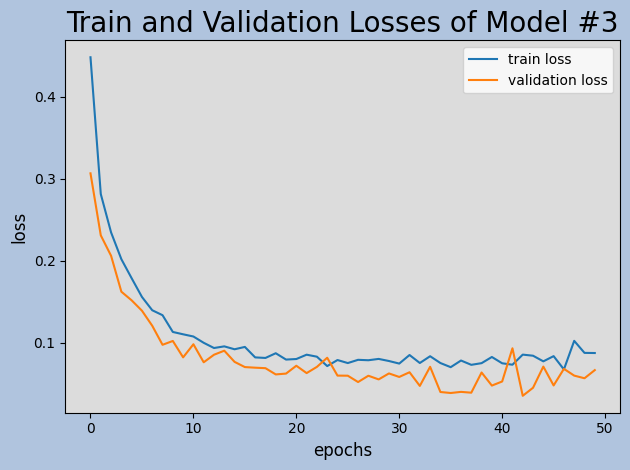

In [ ]:
plt.plot(history3.history['loss'],label='train loss')
plt.plot(history3.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #3',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

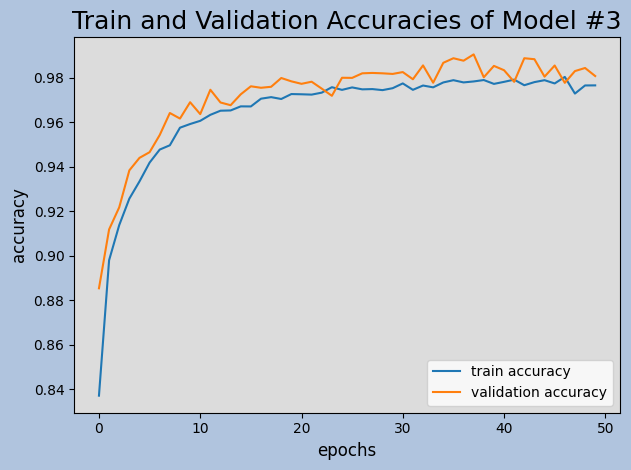

In [ ]:
plt.plot(history3.history['accuracy'],label='train accuracy')
plt.plot(history3.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #3',fontsize=18)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
score3 = model3.evaluate(X_test,test_labels,verbose=0)
print('Test Loss : {:.3f}'.format(score3[0]))
print('Test Accuracy : {:.3f}'.format(score3[1]))

Test Loss : 0.877
Test Accuracy : 0.913


In [ ]:
print('Model #1')
print('Test Loss : {:.3f}'.format(score[0]))
print('Test Accuracy : {:.3f}'.format(score[1]))

print('')

print('Model #2')
print('Test Loss : {:.3f}'.format(score2[0]))
print('Test Accuracy : {:.3f}'.format(score2[1]))

Model #1
Test Loss : 0.428
Test Accuracy : 0.876

Model #2
Test Loss : 0.563
Test Accuracy : 0.896


In [ ]:
optimizer = RMSprop(learning_rate=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

# Defining the learning rate reduction routine
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0000001)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
tf.random.set_seed(42)

DROPOUT = 0.4

model4 = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train[0].shape),
        ### First block of layers ###
        tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(DROPOUT),
        ### Second block of layers ###
        tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(DROPOUT),
        ### Third block of layers ###
        tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(DROPOUT),
        ### Fourth block of layers ###
        tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(DROPOUT),
        ### Final layers before output ###
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(DROPOUT),
        tf.keras.layers.Dense(10, activation="softmax")
])
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=optimizer,metrics=["accuracy"])

# Fit the model (to the normalized data)
history4 = model4.fit(train_data,train_labels,epochs=50,validation_data=(X_validation,y_validation),callbacks=[learning_rate_reduction])


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6928 - loss: 0.9457 - val_accuracy: 0.8789 - val_loss: 0.3407 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.8640 - loss: 0.4095 - val_accuracy: 0.8955 - val_loss: 0.2820 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8858 - loss: 0.3466 - val_accuracy: 0.9124 - val_loss: 0.2439 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8946 - loss: 0.3283 - val_accuracy: 0.9147 - val_loss: 0.2396 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9019 - loss: 0.3057 - val_accuracy: 0.9231 - val_loss: 0.2104 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9038 - loss: 0.3024 - val_accuracy: 0.9257 - val_loss: 0.2083 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.

In [ ]:
model4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,485,846 (9.48 MB)

 Trainable params: 1,241,962 (4.74 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 1,241,964 (4.74 MB)

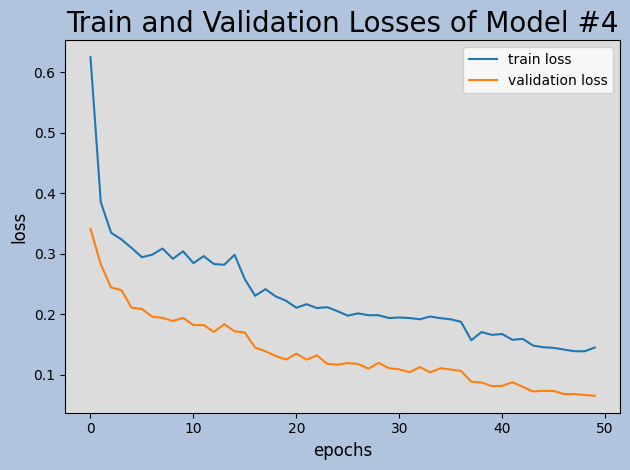

In [ ]:
plt.plot(history4.history['loss'],label='train loss')
plt.plot(history4.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #4',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

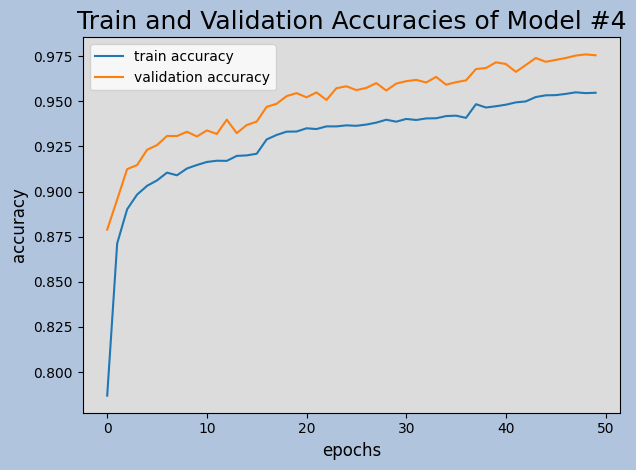

In [ ]:
plt.plot(history4.history['accuracy'],label='train accuracy')
plt.plot(history4.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #4',fontsize=18)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
score4 = model4.evaluate(X_test,test_labels,verbose=0)
print('Test Loss : {:.3f}'.format(score4[0]))
print('Test Accuracy : {:.3f}'.format(score4[1]))

Test Loss : 0.209
Test Accuracy : 0.940


In [ ]:
print('Model #1')
print('Test Loss : {:.3f}'.format(score[0]))
print('Test Accuracy : {:.3f}'.format(score[1]))

print('')

print('Model #2')
print('Test Loss : {:.3f}'.format(score2[0]))
print('Test Accuracy : {:.3f}'.format(score2[1]))

print('')

print('Model #3')
print('Test Loss : {:.3f}'.format(score3[0]))
print('Test Accuracy : {:.3f}'.format(score3[1]))

Model #1
Test Loss : 0.428
Test Accuracy : 0.876

Model #2
Test Loss : 0.563
Test Accuracy : 0.896

Model #3
Test Loss : 0.877
Test Accuracy : 0.913


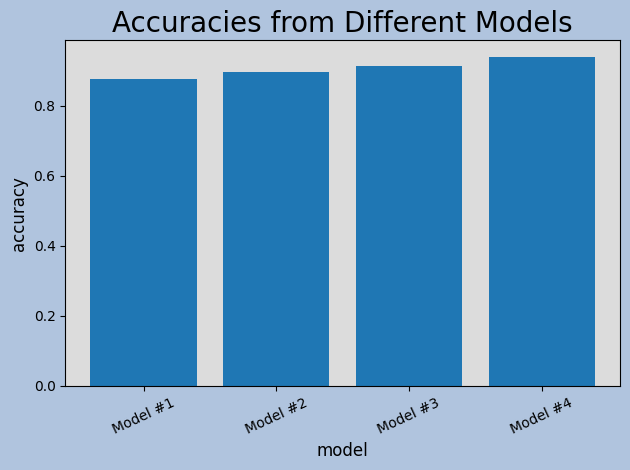

In [ ]:
models_MSE = [score[1],score2[1],score3[1],score4[1]]

models = ['Model #1','Model #2','Model #3','Model #4']

plt.bar(models,models_MSE)
plt.xlabel('model',fontsize=12)
plt.xticks(fontsize=10,rotation=25)
plt.ylabel('accuracy',fontsize=12)
plt.title('Accuracies from Different Models',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.show()
